In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [3]:
Class_Labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(Class_Labels[y[index]])

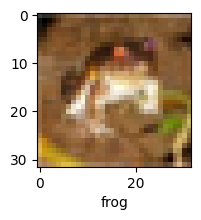

In [10]:
plot_sample(X_train, y_train, 0)

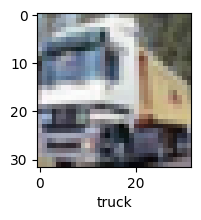

In [11]:
plot_sample(X_train, y_train, 1)

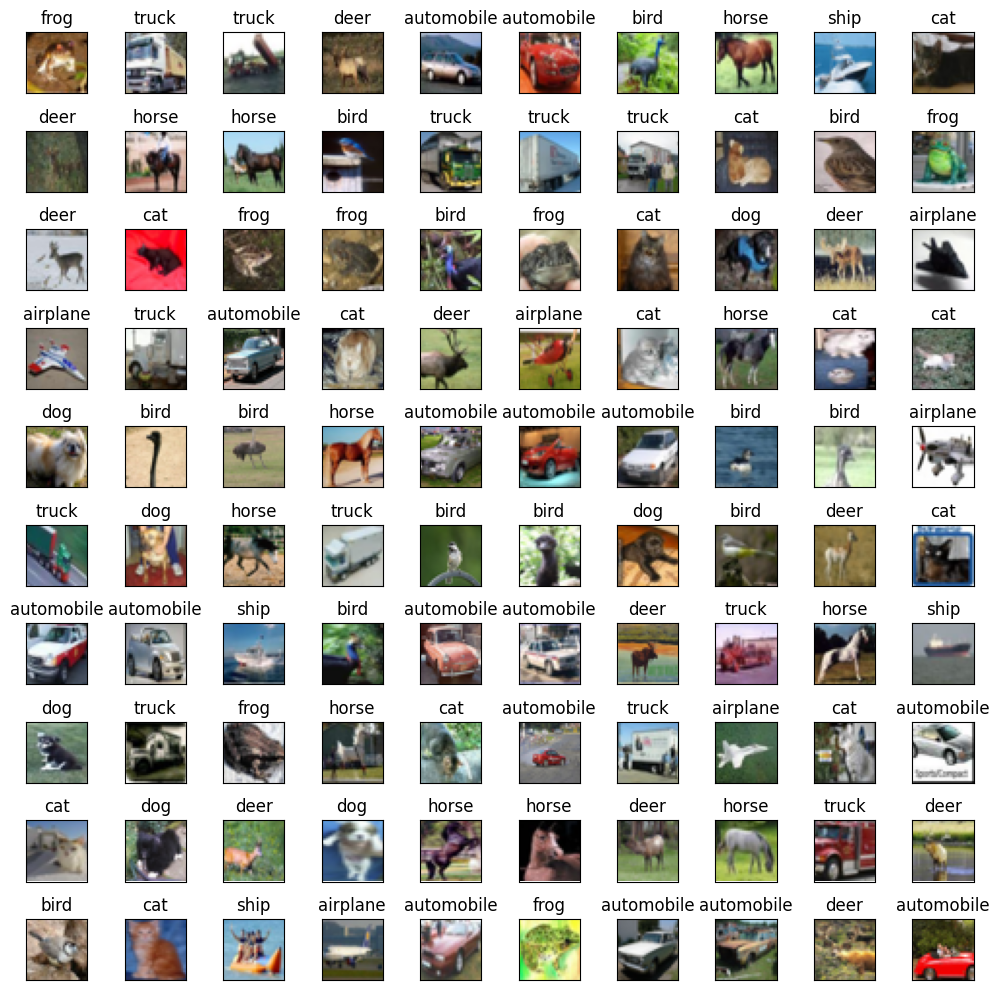

In [12]:
plt.rcParams["figure.figsize"] = (10,10)
fig,axes = plt.subplots(10,10)
for i,ax in enumerate(axes.flatten()):
  ax.imshow(X_train[i])
  ax.set_title(f'{Class_Labels[y_train[i]]}')
  ax.set_xticks([])
  ax.set_yticks([])
fig.tight_layout()

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [14]:
from tensorflow.keras import models, layers, optimizers

CNN1= models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.nn.leaky_relu, input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.leaky_relu),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation=tf.nn.leaky_relu),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(10, activation='softmax')
])

custom_learning_rate = 0.001
custom_optimizer = optimizers.Adam(learning_rate=custom_learning_rate)
# Compile the model
CNN1.compile(optimizer=custom_optimizer,  # You can use other optimizers like 'sgd' or 'rmsprop'
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


In [15]:
CNN1.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 14s 5ms/step - loss: 1.4370 - accuracy: 0.4819
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0140 - accuracy: 0.6432
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8502 - accuracy: 0.7061
Epoch 4/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7333 - accuracy: 0.7454
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6484 - accuracy: 0.7750
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5697 - accuracy: 0.8007
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5075 - accuracy: 0.8220
Epoch 8/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4455 - accuracy: 0.8443
Epoch 9/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3985 - accuracy: 0.8599
Epoch 10/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3

In [16]:
CNN1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.5730 - accuracy: 0.7214


[1.5729689598083496, 0.7214000225067139]

In [17]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [18]:
data_augmentation = Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal",
                                                     input_shape=(32, 32, 3)),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1),
        layers.experimental.preprocessing.RandomContrast(0.05),
    ]
)



In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout

CNN2 = Sequential([
    data_augmentation,
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dropout(0.2),

    Dense(1024, activation='relu'),
    Dropout(0.2),

    Dense(10, activation='softmax')
])



In [20]:
CNN2.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

batch_size = 64
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
width_shift_range=0.1, height_shift_range=0.1,horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

CNN2.fit(train_generator, validation_data=(X_test, y_test),
			steps_per_epoch=steps_per_epoch, epochs=30,callbacks=[EarlyStopping(monitor="val_accuracy",patience=10,verbose=1)])

Epoch 1/30
781/781 [==============================] - 42s 44ms/step - loss: 1.6460 - accuracy: 0.4277 - val_loss: 1.3166 - val_accuracy: 0.5226
Epoch 2/30
781/781 [==============================] - 34s 44ms/step - loss: 1.2866 - accuracy: 0.5402 - val_loss: 1.4581 - val_accuracy: 0.5272
Epoch 3/30
781/781 [==============================] - 33s 43ms/step - loss: 1.1399 - accuracy: 0.5995 - val_loss: 1.1195 - val_accuracy: 0.6110
Epoch 4/30
781/781 [==============================] - 34s 44ms/step - loss: 1.0393 - accuracy: 0.6348 - val_loss: 1.1048 - val_accuracy: 0.6399
Epoch 5/30
781/781 [==============================] - 37s 47ms/step - loss: 0.9589 - accuracy: 0.6662 - val_loss: 1.0321 - val_accuracy: 0.6643
Epoch 6/30
781/781 [==============================] - 37s 47ms/step - loss: 0.9085 - accuracy: 0.6839 - val_loss: 1.1541 - val_accuracy: 0.6292
Epoch 7/30
781/781 [==============================] - 36s 46ms/step - loss: 0.8598 - accuracy: 0.7018 - val_loss: 0.8246 - val_accuracy:

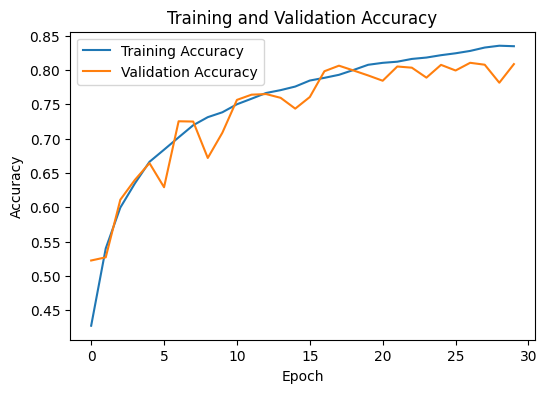

In [22]:
plt.figure(figsize=(6, 4))
plt.plot(CNN2.history.history['accuracy'], label='Training Accuracy')
plt.plot(CNN2.history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


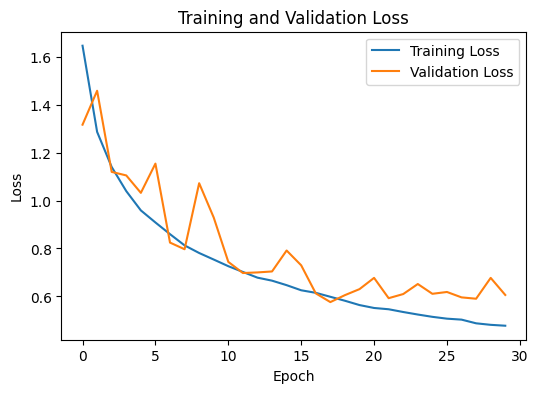

In [23]:
plt.figure(figsize=(6, 4))
plt.plot(CNN2.history.history['loss'], label='Training Loss')
plt.plot(CNN2.history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [24]:
CNN2.save('/content/CIFAR10.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
